In [20]:
import pandas as pd
generation_df = pd.read_csv('generation_data.csv')
df = pd.read_csv('demand_data.csv')
df.head(20)

,Date,Hourly Profile,Season,Date (MST),Region,Load
0,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Calgary,1028.338459
1,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Central,1326.524094
2,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Edmonton,1375.897642
3,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Losses,279.050196
4,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Northeast,907.567566
5,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,Northwest,989.678469
6,01/01/2015,OFF PEAK,WINTER,01/01/2015 00:00:00,South,922.893997
7,01/01/2015,OFF PEAK,WINTER,01/01/2015 01:00:00,Calgary,980.030622
8,01/01/2015,OFF PEAK,WINTER,01/01/2015 01:00:00,Central,1298.527004
9,01/01/2015,OFF PEAK,WINTER,01/01/2015 01:00:00,Edmonton,1326.323900


In [10]:
# Convert Date to datetime object with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Set Date as the index
df.set_index('Date', inplace=True)

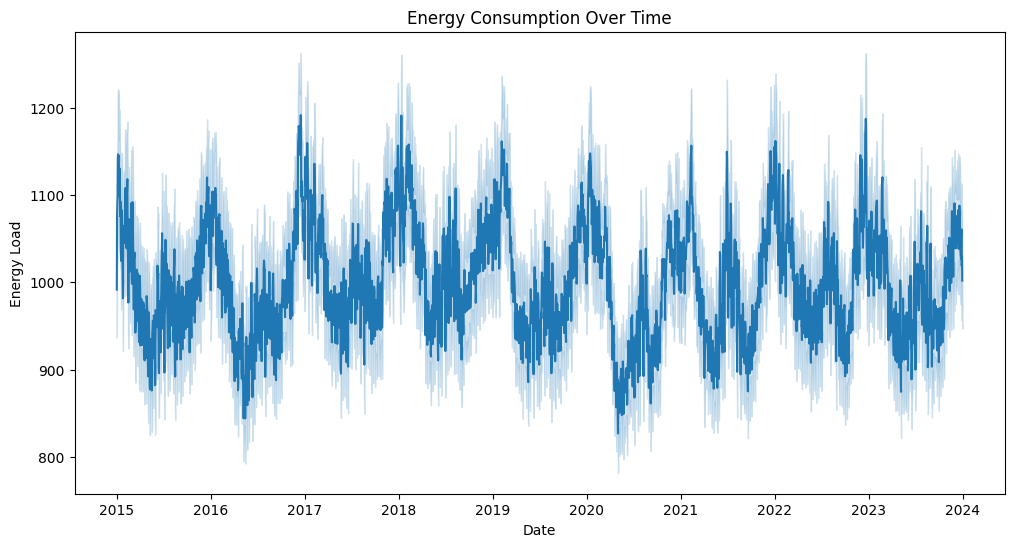

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot overall energy consumption trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y='Load', data=df)
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.show()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming df is your DataFrame with a datetime index
plt.figure(figsize=(15, 10))

# Get unique years in the DataFrame
years = df.index.year.unique()

for i, year in enumerate(years, 1):
    plt.subplot(2, 2, i)
    data_year = df[df.index.year == year]
    sns.lineplot(x=data_year.index, y='Load', data=data_year)

    # Add months to x-axis ticks using month numbers
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

    plt.title(f'Energy Consumption - {year}')
    plt.xlabel('Date')
    plt.ylabel('Energy Load')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'year'

<Figure size 1500x1000 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Assuming df is your DataFrame with a datetime index
plt.figure(figsize=(15, 10))

# Get unique years in the DataFrame
years = df.index.year.unique()

for i, year in enumerate(years, 1):
    plt.subplot(4, 2, i)
    data_year = df[df.index.year == year]
    
    # Plot lines for each season with different colors
    for season, color in zip(df['Season'].unique(), ['blue', 'green', 'orange', 'red']):
        data_season = data_year[data_year['Season'] == season]
        sns.lineplot(x=data_season.index, y='Load', data=data_season, label=season, color=color)

    # Add months to x-axis ticks using month numbers
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

    plt.title(f'Energy Consumption - {year}')
    plt.xlabel('Date')
    plt.ylabel('Energy Load')
    plt.legend()
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'year'

<Figure size 1500x1000 with 0 Axes>

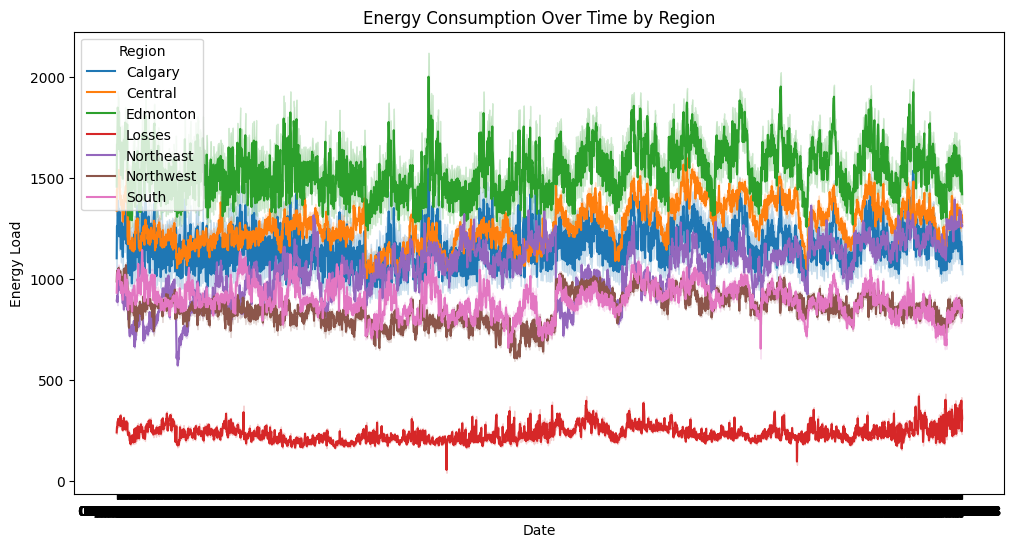

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with energy consumption and 'Region' column
# Replace 'Load' and 'Region' with the actual column names

# Plot energy consumption grouped by region
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Load', hue='Region', data=df)
plt.title('Energy Consumption Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Energy Load')
plt.legend(title='Region')
plt.show()

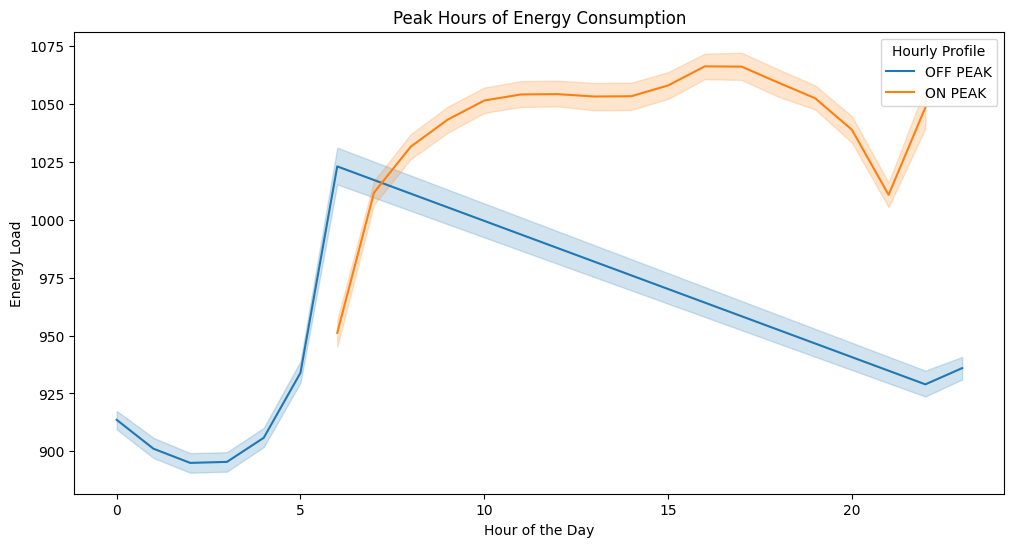

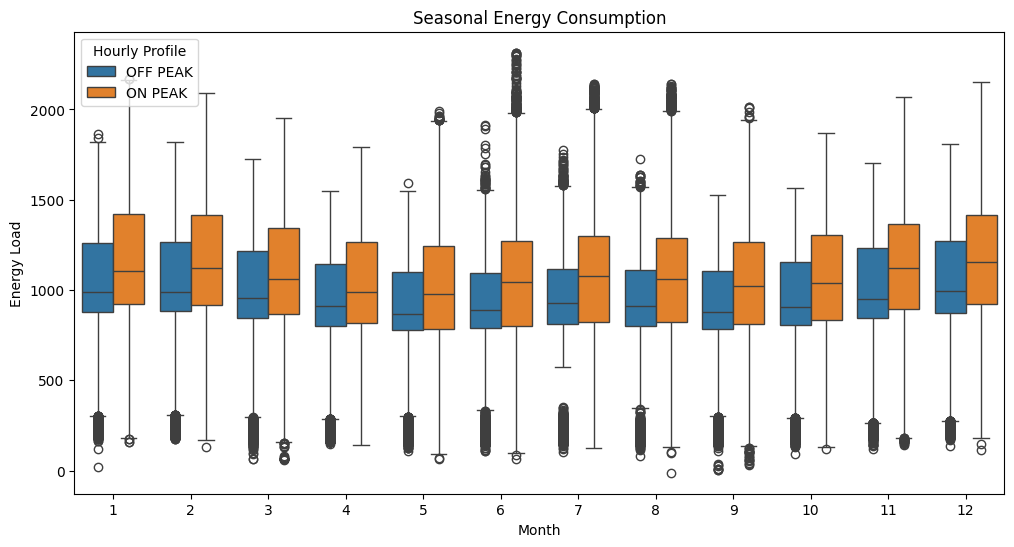

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with energy consumption
# Replace 'Hourly Profile', 'Load', and 'Date (MST)' with the actual column names

# Convert 'Date (MST)' column to datetime
df['Date (MST)'] = pd.to_datetime(df['Date (MST)'], dayfirst=True)

# Extract hour and month from the 'Date (MST)' column
df['Hour'] = df['Date (MST)'].dt.hour
df['Month'] = df['Date (MST)'].dt.month

# Plot peak hours
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Load', hue='Hourly Profile', data=df)
plt.title('Peak Hours of Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Load')
plt.legend(title='Hourly Profile')
plt.show()

# Plot energy consumption by season
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Load', data=df, hue='Hourly Profile')
plt.title('Seasonal Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Energy Load')
plt.legend(title='Hourly Profile')
plt.show()